##### This notebook shows how to build and reduce a scenario tree out of a scenario fan using scenred2
##### The scenred2.jl package tree and fan structures are converted into directed graphs of lighgraphs package to be plot using TikzGraphs and TikzPictures
##### If you don't want to plot or install tikz packages you can delete all lines containing TikzGraphs and TikzPictures and still run the scenario tree construction

In [1]:
using Scenred2, LightGraphs, TikzGraphs, TikzPictures

In [2]:
T = 5 #number of time steps
S = 19 # number of scenarios
R = 2 # number of random variables

# we create randomly a discrete probability distribution for the S scenarios
probas = rand(S)
probas = round.(probas./sum(probas),4)
probas[end] = 1-sum(probas[1:end-1])

# we create S random scenarios
scenarios = [Scenred2Scenario(p, round.(rand(T,R),3)) for p in probas ]

# We build a fan out of the S scenarios associated with their probability
fan = Scenred2Fan(T,S,R,scenarios)

Scenred2.Scenred2Fan(5, 19, 2, Scenred2.Scenred2Scenario[Scenred2.Scenred2Scenario(0.0414, [0.396 0.231; 0.691 0.195; … ; 0.57 0.53; 0.163 0.327]), Scenred2.Scenred2Scenario(0.046, [0.789 0.052; 0.806 0.345; … ; 0.166 0.373; 0.129 0.855]), Scenred2.Scenred2Scenario(0.0467, [0.947 0.223; 0.767 0.983; … ; 0.386 0.113; 0.591 0.103]), Scenred2.Scenred2Scenario(0.0908, [0.925 0.868; 0.113 0.118; … ; 0.841 0.435; 0.308 0.447]), Scenred2.Scenred2Scenario(0.0656, [0.547 0.162; 0.145 0.054; … ; 0.762 0.423; 0.384 0.128]), Scenred2.Scenred2Scenario(0.0869, [0.804 0.456; 0.711 0.624; … ; 0.952 0.823; 0.891 0.687]), Scenred2.Scenred2Scenario(0.0091, [0.291 0.766; 0.417 0.421; … ; 0.897 0.74; 0.718 0.016]), Scenred2.Scenred2Scenario(0.0877, [0.107 0.258; 0.298 0.229; … ; 0.787 0.979; 0.855 0.793]), Scenred2.Scenred2Scenario(0.022, [0.528 0.13; 0.148 0.841; … ; 0.482 0.085; 0.467 0.588]), Scenred2.Scenred2Scenario(0.0279, [0.655 0.511; 0.802 0.814; … ; 0.983 0.808; 0.695 0.922]), Scenred2.Scenred2Sc

In [3]:
# if the fan is reasonably small we plot and save it using tikzgraphs 
if S<20
    fdg = DiGraph(fan) #we convert the fan into a directed graph of lightgraphs
    ft=TikzGraphs.plot(fdg[1], string.(fdg[3]), edge_labels = fdg[2] ) #we plot the digraph
    TikzPictures.save(PDF("fan"), ft) #we save it as fan.pdf in the active directory
end

In [4]:
prms = Scenred2Prms(red_percentage = 0.5) # we define scenred2 parameters, all default except the reduction percentage

tree = Scenred2Tree(fan, prms) # we build a tree out of the fan calling scenred2 with the parameters


***********************************************
*  SCENARIO TREE CONSTRUCTION / REDUCTION     *
*                                             *
*  S C E N R E D - 2                          *
*                                             *
*  VERSION: 12/12/2008                        *
*                                             *
*  (C) - Humboldt-University Berlin           *
*        Institute of Mathematics             *
*        Written by: Holger Heitsch           *
*                                             *
***********************************************

YOU ARE EXECUTING THE COMMAND LINE VERSION

MAIN: READ COMMAND FILE
    OUTPUT OF TREE
    TREE CONSTRUCTION SELECTED
    READ SCENARIO PARAMETERS
MAIN: READ COMMAND FILE DONE
MAIN: START TREE CONSTRUCTION
    DETECT CONSTRUCTION METHOD
    CONSTRUCTION METHOD BACKWARD
    READ CONSTRUCTION OPTIONS
    ASSIGN SCENARIO DISTANCES
    START BACKWARD TREE CONSTRUCTION
      REDUCTION METHOD: FORWARD
    *** SCENARIO TREE C

Scenred2.Scenred2Tree(13, 2, Scenred2.Scenred2Node[Scenred2.Scenred2Node(1, 1.0, [0.639, 0.3829]), Scenred2.Scenred2Node(1, 1.0, [0.744, 0.319]), Scenred2.Scenred2Node(2, 0.2721, [0.684, 0.866]), Scenred2.Scenred2Node(2, 0.7279, [0.459, 0.332]), Scenred2.Scenred2Node(3, 0.2721, [0.841, 0.435]), Scenred2.Scenred2Node(4, 0.2116, [0.952, 0.823]), Scenred2.Scenred2Node(4, 0.5163, [0.42, 0.241]), Scenred2.Scenred2Node(5, 0.2721, [0.308, 0.447]), Scenred2.Scenred2Node(6, 0.1148, [0.891, 0.687]), Scenred2.Scenred2Node(6, 0.0968, [0.855, 0.793]), Scenred2.Scenred2Node(7, 0.0807, [0.97, 0.692]), Scenred2.Scenred2Node(7, 0.1783, [0.949, 0.29]), Scenred2.Scenred2Node(7, 0.2573, [0.529, 0.886])])

In [6]:
dg = DiGraph(tree) #we convert the tree as a directed graph

({13, 12} directed simple Int64 graph, Dict{Any,Any}(Pair{Any,Any}((2, 3), 0.2721),Pair{Any,Any}((6, 9), 0.1148),Pair{Any,Any}((7, 13), 0.2573),Pair{Any,Any}((4, 6), 0.2116),Pair{Any,Any}((4, 7), 0.5163),Pair{Any,Any}((7, 11), 0.0807),Pair{Any,Any}((5, 8), 0.2721),Pair{Any,Any}((6, 10), 0.0968),Pair{Any,Any}((2, 4), 0.7279),Pair{Any,Any}((1, 2), 1.0)…), Array{Float64,1}[[0.639, 0.3829], [0.744, 0.319], [0.684, 0.866], [0.459, 0.332], [0.841, 0.435], [0.952, 0.823], [0.42, 0.241], [0.308, 0.447], [0.891, 0.687], [0.855, 0.793], [0.97, 0.692], [0.949, 0.29], [0.529, 0.886]])

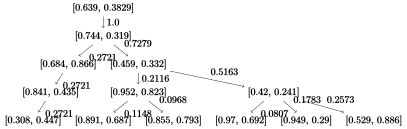

In [7]:
t=TikzGraphs.plot(dg[1], string.(dg[3]), edge_labels = dg[2] ) #we plot it

In [8]:
TikzPictures.save(PDF("tree"), t) #we save it as tree.pdf in the active directory

In [10]:
rprms = Scenred2Prms(red_percentage = 0.8) #we define new reduction parameters
rtree = Scenred2.reduce_tree(tree, rprms) #we reduce the previously constructed tree


***********************************************
*  SCENARIO TREE CONSTRUCTION / REDUCTION     *
*                                             *
*  S C E N R E D - 2                          *
*                                             *
*  VERSION: 12/12/2008                        *
*                                             *
*  (C) - Humboldt-University Berlin           *
*        Institute of Mathematics             *
*        Written by: Holger Heitsch           *
*                                             *
***********************************************

YOU ARE EXECUTING THE COMMAND LINE VERSION

MAIN: READ COMMAND FILE
    OUTPUT OF TREE
    SCENRED SELECTED
    READ SCENARIO PARAMETERS
MAIN: READ COMMAND FILE DONE
MAIN: START SCENRED 
    READING SCENRED OPTIONS
    ASSIGN SCENARIO DISTANCES
    START SCENARIO REDUCTION
      METHOD: FORWARD SELECTION
        START FORWARD ITERATION
    *** SCENARIO REDUCTION SUCCESSFUL
    SCENRED SUMMARY
      REDUCTION METHOD: FO

Scenred2.Scenred2Tree(8, 2, Scenred2.Scenred2Node[Scenred2.Scenred2Node(1, 1.0, [0.639, 0.3829]), Scenred2.Scenred2Node(1, 1.0, [0.744, 0.319]), Scenred2.Scenred2Node(2, 0.2721, [0.684, 0.866]), Scenred2.Scenred2Node(2, 0.7279, [0.459, 0.332]), Scenred2.Scenred2Node(3, 0.2721, [0.841, 0.435]), Scenred2.Scenred2Node(4, 0.7279, [0.42, 0.241]), Scenred2.Scenred2Node(5, 0.2721, [0.308, 0.447]), Scenred2.Scenred2Node(6, 0.7279, [0.97, 0.692])])

In [11]:
rg = DiGraph(rtree) #we convert it into a directed graph

({8, 7} directed simple Int64 graph, Dict{Any,Any}(Pair{Any,Any}((1, 2), 1.0),Pair{Any,Any}((2, 3), 0.2721),Pair{Any,Any}((2, 4), 0.7279),Pair{Any,Any}((6, 8), 0.7279),Pair{Any,Any}((4, 6), 0.7279),Pair{Any,Any}((3, 5), 0.2721),Pair{Any,Any}((5, 7), 0.2721)), Array{Float64,1}[[0.639, 0.3829], [0.744, 0.319], [0.684, 0.866], [0.459, 0.332], [0.841, 0.435], [0.42, 0.241], [0.308, 0.447], [0.97, 0.692]])

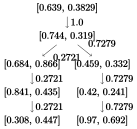

In [12]:
rt = TikzGraphs.plot(rg[1], string.(rg[3]), edge_labels = rg[2] ) #we plot it

In [13]:
TikzPictures.save(PDF("reduced_tree"), rt) #we save it as reduced_tree.pdf in the active directory